# Dataset links:
1. https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
2. https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset

# Discussions
1. Should we just use the IBM dataset or the second set or combine them
2. How do we use Gen-AI in this project?
3. EDA
4. Features
5. Dimension reduction?
6. Classification
7. NN / DL: Are we gonna use supervised learning or NN/DL
8. Deployment

In [1]:
%pip install matplotlib seaborn pandas numpy openai scikit-learn fastapi streamlit dotenv
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu130

Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cu130
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from openai import OpenAI

In [3]:
# load OpenAI API key


OPENAI_API_KEY = ''
try:
	from google.colab import userdata
	print("Running in Google Colab")
	OPENAI_API_KEY = userdata.get('OPENAI_API_KEY', '')
except ImportError:
	import dotenv
	dotenv.load_dotenv()
	print("Running locally")
	OPENAI_API_KEY = os.environ.get('OPENAI_API_KEY', '')

openai = OpenAI(api_key=OPENAI_API_KEY)
try:
	response = openai.models.list()
	print("Available models:", response.data)
	print("OpenAI API key is valid.")
except Exception as e:
	print("Error with OpenAI API key:", e)

Running locally
Available models: [Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='gpt-4o-mini-realtime-preview', created=1734387380, object='model', owned_by='system'), Model(id='gpt-5-nano', created=1754426384, object='model', owned_by='system'), Model(id='text-embedding-ada-002', created=1671217299, object='model', owned_by='openai-internal')]
OpenAI API key is valid.


In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# convert 'Attrition' to binary classes: Yes=1, No=0
df["Attrition_Binary"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# Convert 'MaritalStatus' to numerical classes: Married=1, Single=0, Divorced=2
df["Marital_Status_Class"] = df["MaritalStatus"].apply(lambda x: 1 if x == "Married" else (0 if x == "Single" else 2))

# Convert 'Gender' to binary classes: Male=1, Female=0
df["Gender_Binary"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)


# convert 'OverTime' to binary classes: Yes=1, No=0
df["OverTime_Binary"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

# convert 'BusinessTravel' to numerical classes: Non-Travel=0, Travel_Rarely=1, Travel_Frequently=2
df["Business_Travel_Class"] = df["BusinessTravel"].apply(lambda x: 0 if x == "Non-Travel" else (1 if x == "Travel_Rarely" else 2))

display(df.head(10))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Marital_Status_Binary,Marital_Status_Class,Gender_Binary,OverTime_Binary,Business_Travel_Class
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,6,4,0,5,1,0,0,0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,7,1,7,0,1,1,1,0,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,1,0,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,7,3,0,0,1,1,0,1,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,2,2,0,1,1,1,0,1
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,7,7,3,6,0,0,0,1,0,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,0,0,0,0,1,1,0,1,1
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,1,0,0,0,0,2,2,1,0,1
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,9,7,1,8,0,0,0,1,0,2
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,7,7,7,7,0,1,1,1,0,1


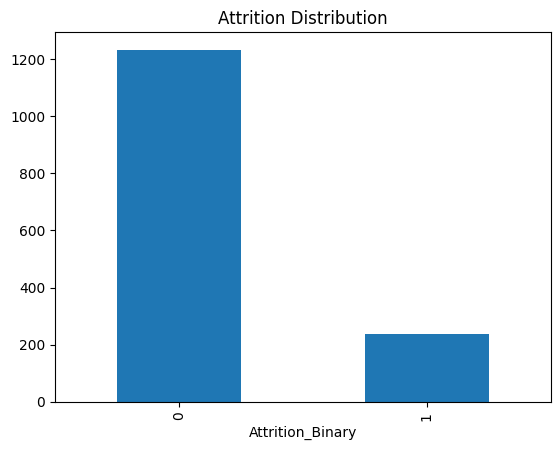

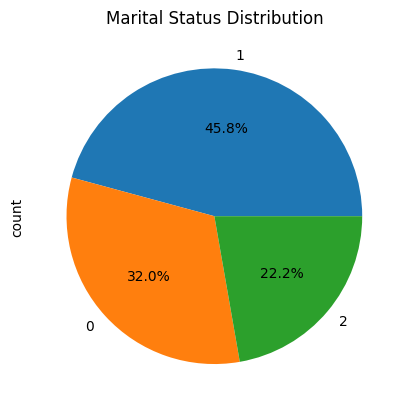

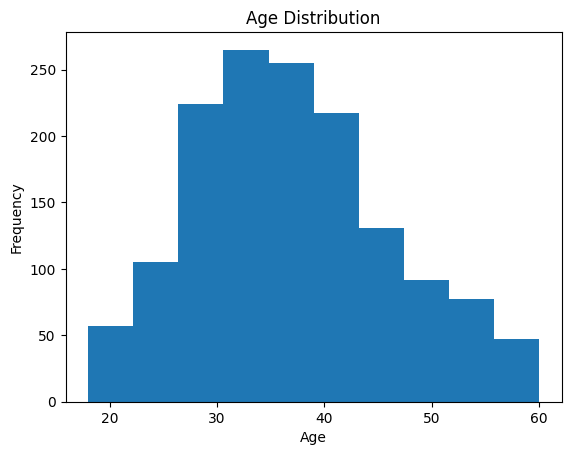

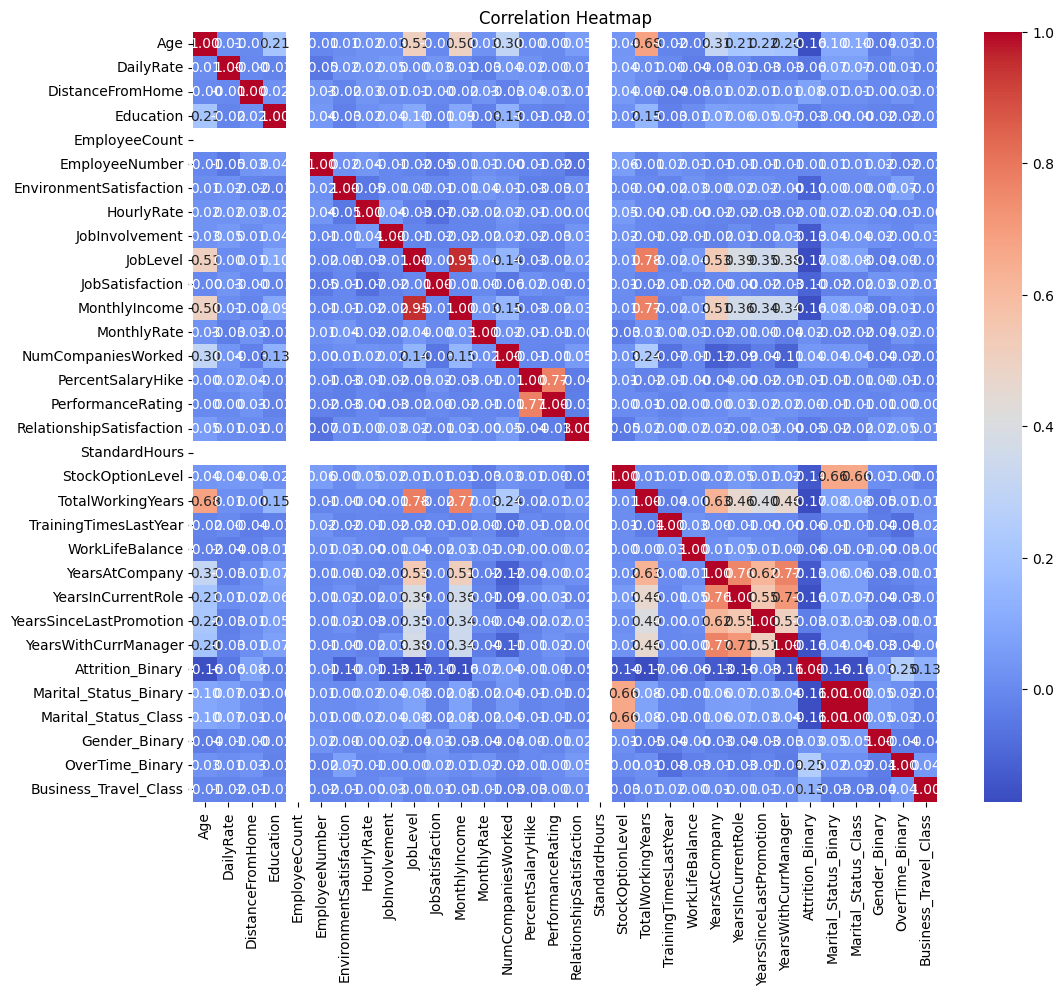

In [15]:

df['Attrition_Binary'].value_counts().plot(kind='bar')
plt.title('Attrition Distribution')
plt.show()

# TODO : Plot a pie chart for Marital Status distribution
df['Marital_Status_Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()

# TODO : Plot a histogram for Age distribution
df['Age'].plot(kind='hist', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Correlation heatmap for numerical features
import seaborn as sns
plt.figure(figsize=(12,10))
correlation_matrix = df[df.select_dtypes(include=[np.number]).columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Binary,Marital_Status_Binary,Marital_Status_Class,Gender_Binary,OverTime_Binary,Business_Travel_Class
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,7.008163,4.229252,2.187755,4.123129,0.161224,0.902721,0.902721,0.600000,0.282993,1.086395
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,6.126525,3.623137,3.222430,3.568136,0.367863,0.730121,0.730121,0.490065,0.450606,0.532170
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,5.000000,3.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,40.000000,18.000000,15.000000,17.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
